# Random Forest hyperparameter tuning in Python scikit-learn libary##
#Qiudong Deng 
#qddeng@gmail.com

In [22]:
#set wd
import os
os.getcwd()
os.chdir('E:/2016 spring course/msa 8150/random forest')
os.getcwd()

# import modules
import pandas as pd
import numpy as np
import subprocess

#read data in-1
df = pd.read_csv("adult income dataset.csv", index_col=0)
#list(df)
ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
df.groupby('y').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1 col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'y':'Target'}, inplace=True)
#list(df1)
#df1

y = df1["Target"]
X = df1[features]

32561 x 15
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
y                 object
dtype: object
age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
y                 int64
dtype: object
* features:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [24]:
%matplotlib

fig = plt.figure(figsize=(20, 20))

df1.hist(bins=20)
plt.show()

Using matplotlib backend: TkAgg


--------------- Correlation Matrix ---------------


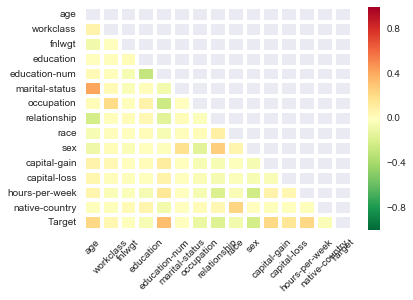

In [18]:
# a quick check the correlation
corr_df = df1.corr()

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
print("--------------- Correlation Matrix ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1 ,mask = mask,  linewidths=3,fmt='.1f')
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0,fontsize=10) 
plt.xticks(rotation=45,fontsize=10) 
plt.show()

In [19]:
#modules for hyperparameter optimization

print(__doc__)
import numpy as np
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


# build a classifier
clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters space
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

Automatically created module for IPython interactive environment
RandomizedSearchCV took 64.69 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.863 (std: 0.004)
Parameters: {'min_samples_leaf': 8, 'criterion': 'gini', 'max_features': 2, 'max_depth': None, 'min_samples_split': 8, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.861 (std: 0.005)
Parameters: {'min_samples_leaf': 8, 'criterion': 'gini', 'max_features': 5, 'max_depth': None, 'min_samples_split': 5, 'bootstrap': True}

Model with rank: 3
Mean validation score: 0.861 (std: 0.004)
Parameters: {'min_samples_leaf': 9, 'criterion': 'gini', 'max_features': 8, 'max_depth': None, 'min_samples_split': 9, 'bootstrap': False}



In [20]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

GridSearchCV took 556.10 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.863 (std: 0.005)
Parameters: {'min_samples_leaf': 10, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None, 'min_samples_split': 3, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.863 (std: 0.005)
Parameters: {'min_samples_leaf': 10, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None, 'min_samples_split': 1, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.863 (std: 0.005)
Parameters: {'min_samples_leaf': 10, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None, 'min_samples_split': 10, 'bootstrap': False}



In [6]:
#split data to train and test sets
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df1, test_size = 0.5)

y = train["Target"]
X = train[features]

In [7]:
#using default parameters to build random forest model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted1 = clf.predict(X1)

print(metrics.classification_report(expected, predicted1))
print(metrics.confusion_matrix(expected, predicted1))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12391
          1       0.74      0.59      0.65      3890

avg / total       0.84      0.85      0.85     16281

[[11567   824]
 [ 1601  2289]]


In [8]:
# roc1 for default parameters
probas1_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(expected, probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

0.88273962837692743

In [9]:
#use the best parameters found from RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=3, bootstrap= False, min_samples_split=1,
     max_depth=None, min_samples_leaf=7)
clf.fit(X, y)
from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted2 = clf.predict(X1)

print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91     12391
          1       0.76      0.61      0.68      3890

avg / total       0.86      0.86      0.86     16281

[[11635   756]
 [ 1498  2392]]


In [10]:
# roc2 for RandomizedSearchCV
probas2_ = clf.fit(X, y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(expected,probas2_[:, 1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.90989142546657231

In [13]:
#use the best parameters from GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_features=3, bootstrap= False, min_samples_split=1,
                             max_depth=None, min_samples_leaf=10)
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted3 = clf.predict(X1)

print(metrics.classification_report(expected, predicted3))
print(metrics.confusion_matrix(expected, predicted3))
#0 income<=50k
#1 income > 50k

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     12391
          1       0.77      0.61      0.68      3890

avg / total       0.86      0.86      0.86     16281

[[11677   714]
 [ 1521  2369]]


In [14]:
# roc GridSearchCV
probas3_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(expected,probas3_[:, 1])
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc3

0.91011162841261151

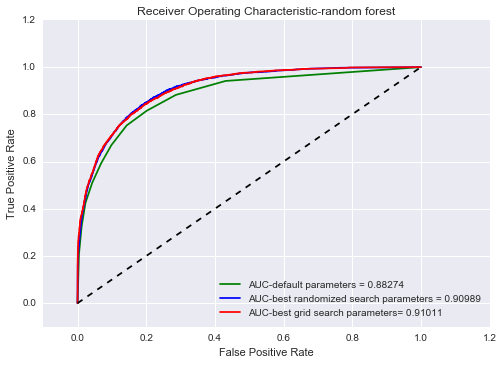

In [15]:
plt.title('Receiver Operating Characteristic-random forest')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-default parameters = %0.5f'% roc_auc1)


plt.plot(false_positive_rate2, true_positive_rate2, 'b',
label='AUC-best randomized search parameters = %0.5f'% roc_auc2)

plt.plot(false_positive_rate3, true_positive_rate3, 'r',
label='AUC-best grid search parameters= %0.5f'% roc_auc3)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Feature ranking:
1. feature 5 (0.169404)
2. feature 7 (0.163835)
3. feature 10 (0.161388)
4. feature 0 (0.125563)
5. feature 4 (0.123969)
6. feature 12 (0.048685)
7. feature 6 (0.044262)
8. feature 11 (0.042047)
9. feature 2 (0.037913)
10. feature 3 (0.030286)
11. feature 9 (0.025353)
12. feature 1 (0.017205)
13. feature 8 (0.005261)
14. feature 13 (0.004831)


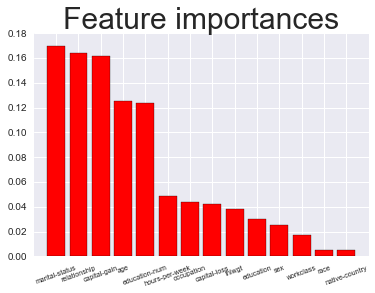

In [21]:
#find the importance ranking 
#use the best parameters from gridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=3, bootstrap= False, min_samples_split=3,
                             max_depth=None, min_samples_leaf=10)


forest=clf.fit(X, y)

#label for x-axis
features_name = np.array(X.columns.values)
features_name

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure()
plt.title("Feature importances",size=30)
plt.bar(range(X.shape[1]), importances[indices],
      yerr=std[indices], color='r' , align="center")
plt.xticks(range(X.shape[1]), features_name[indices],rotation=20,fontsize = 7)
plt.xlim([-1, X.shape[1]])
plt.show()


In [23]:
#figures can be exported in higher resolution, when choosing matplotlib plot not inline